In [2]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
Sdata=pd.read_csv("Salary_Data.csv")
Sdata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
Sdata.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


# EDA & Visualisation  

In [5]:
Sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
Sdata.shape

(30, 2)

In [7]:
Sdata.dtypes

YearsExperience    float64
Salary             float64
dtype: object

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

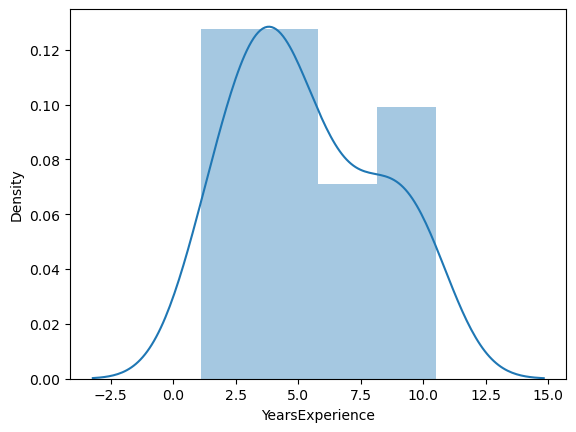

In [8]:
sns.distplot(Sdata['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

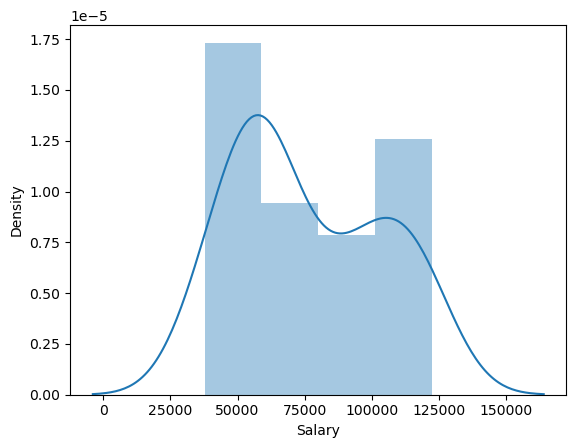

In [9]:
sns.distplot(Sdata['Salary'])

# Duplicated Data

In [10]:
Sdata[Sdata.duplicated()].shape

(0, 2)

In [11]:
Sdata[Sdata.duplicated()]

,YearsExperience,Salary


# Rename the columns

In [12]:
Sdata_ren=Sdata.rename({"YearsExperience":"Years_experience", "Salary":"Salary_hike"}, axis=1)

In [13]:
Sdata_ren.head(2)

,Years_experience,Salary_hike
0,1.1,39343.0
1,1.3,46205.0


In [15]:
Sdata_cop=Sdata_ren.copy()

In [18]:
Sdata_cop.head()

,Years_experience,Salary_hike
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Outlier Detection

<AxesSubplot:>

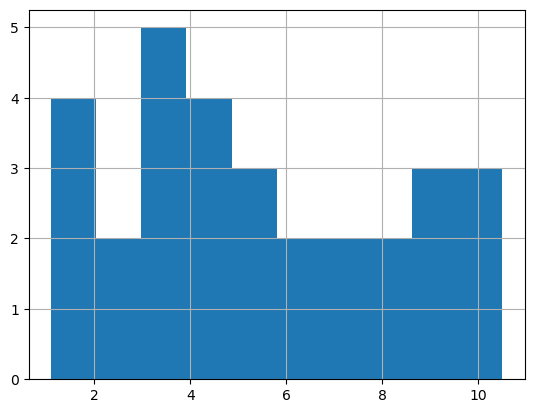

In [19]:
Sdata_ren['Years_experience'].hist()

<AxesSubplot:>

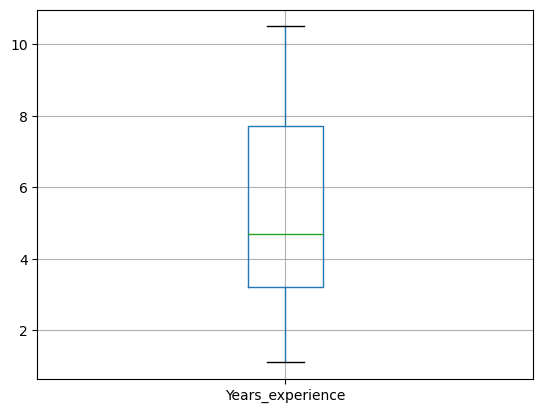

In [21]:
Sdata_ren.boxplot(column='Years_experience')

In [40]:
Sdata_ren['Years_experience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: Years_experience, dtype: float64

<AxesSubplot:>

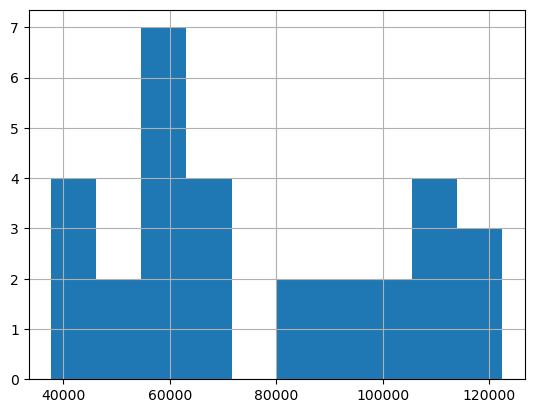

In [42]:
Sdata_ren['Salary_hike'].hist()

<AxesSubplot:>

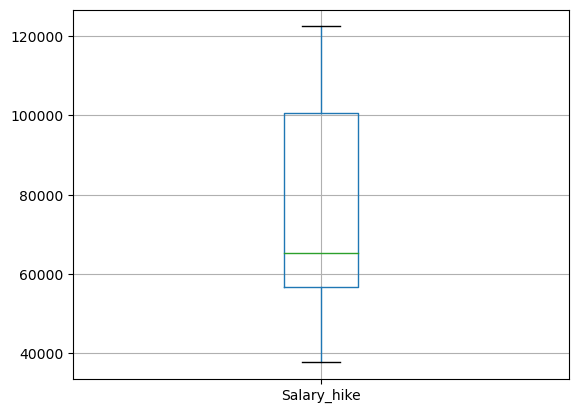

In [22]:
Sdata_ren.boxplot(column='Salary_hike')

In [23]:
Sdata_ren['Salary_hike'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary_hike, dtype: float64

# Missing Values Imputation

In [25]:
Sdata_ren.isnull().head()

,Years_experience,Salary_hike
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


<AxesSubplot:>

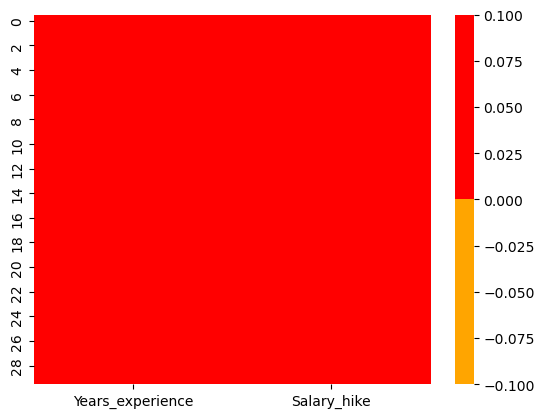

In [26]:
#Heatmap
cols=Sdata_ren.columns
colors=['orange', 'red']
sns.heatmap(Sdata_ren[cols].isnull(), cmap=colors)

In [28]:
Sdata_ren[Sdata_ren.isnull().any(axis=1)].head()

,Years_experience,Salary_hike


# Correction & Ploting the Dtata 

In [29]:
Sdata_ren.corr()

,Years_experience,Salary_hike
Years_experience,1.000000,0.978242
Salary_hike,0.978242,1.000000


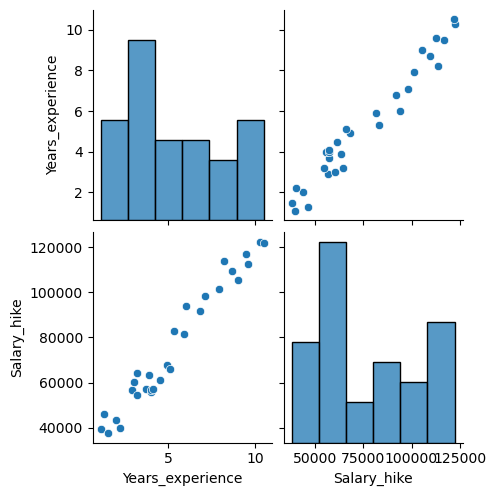

In [30]:
sns.pairplot(Sdata_ren)

<AxesSubplot:xlabel='Years_experience', ylabel='Salary_hike'>

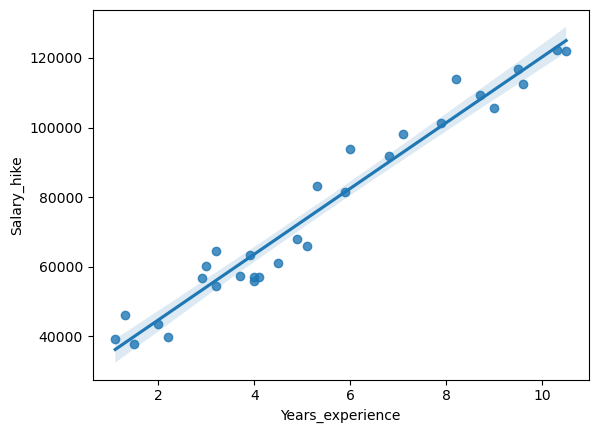

In [31]:
sns.regplot(x=Sdata_ren['Years_experience'], y=Sdata_ren['Salary_hike'])

# Transoformations

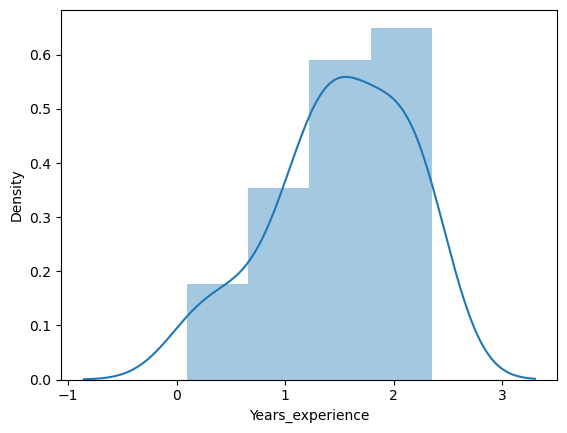

<Figure size 640x480 with 0 Axes>

In [37]:
import numpy as np
import matplotlib.pyplot as plt

Sdata_log = np.log(Sdata_cop['Years_experience'])
sns.distplot(Sdata_log)
fig=plt.figure()

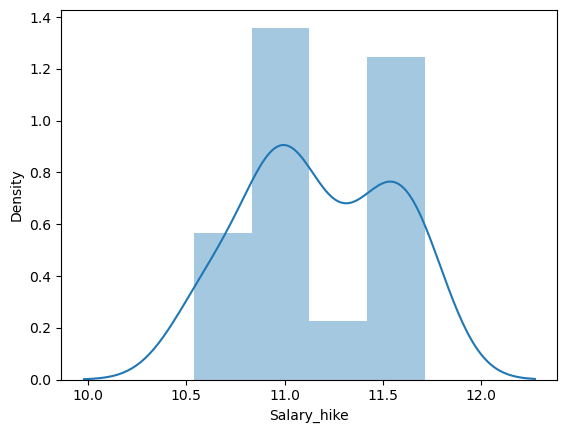

<Figure size 640x480 with 0 Axes>

In [51]:
#log Transformation of Salary_hike
Sdata_logG = np.log(Sdata_cop['Salary_hike'])
sns.distplot(Sdata_logG)
fig=plt.figure()

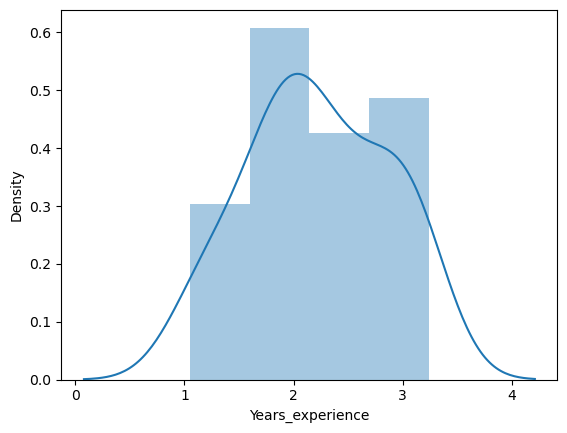

<Figure size 640x480 with 0 Axes>

In [52]:
Sdata_Sqrt = np.sqrt(Sdata_cop['Years_experience'])
sns.distplot(Sdata_Sqrt)
fig=plt.figure()

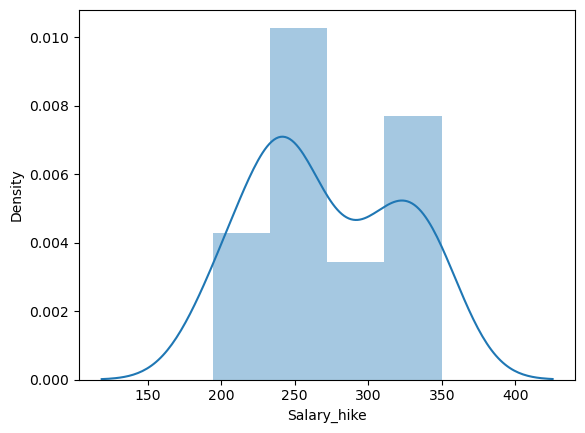

<Figure size 640x480 with 0 Axes>

In [53]:
Sdata_SqrtS = np.sqrt(Sdata_cop['Salary_hike'])
sns.distplot(Sdata_SqrtS)
fig=plt.figure()

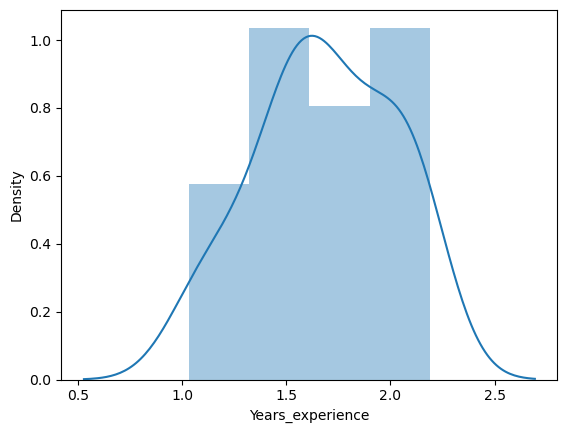

<Figure size 640x480 with 0 Axes>

In [54]:
Sdata_Cbrt = np.cbrt(Sdata_cop['Years_experience'])
sns.distplot(Sdata_Cbrt)
fig=plt.figure()

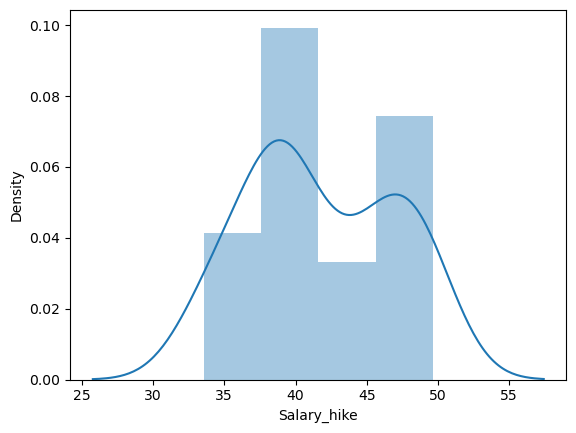

<Figure size 640x480 with 0 Axes>

In [55]:
Sdata_CbrtS = np.cbrt(Sdata_cop['Salary_hike'])
sns.distplot(Sdata_CbrtS)
fig=plt.figure()

In [56]:
from numpy import set_printoptions 
from sklearn.preprocessing import MinMaxScaler

In [57]:
Sdata_ren.values

array([[1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00, 1.12635e+05],
       [1.03000e+01,

In [58]:
array=Sdata_ren.values
scalar =MinMaxScaler(feature_range=(0,1))
rescaledx=scalar.fit_transform(array[:,0:5])

#Transformed Data
set_printoptions(precision =2)
print(rescaledx[0:5,:])

[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]]


In [59]:
#Standerdized Data
from sklearn.preprocessing import StandardScaler 
array=Sdata_ren.values
scalar =StandardScaler().fit(array)
rescaledx=scalar.transform(array)

#Summurize Transformed Data
set_printoptions(precision=2)
print(rescaledx[0:5,:])

[[-1.51 -1.36]
 [-1.44 -1.11]
 [-1.37 -1.42]
 [-1.19 -1.2 ]
 [-1.12 -1.34]]


# Create the Model

In [60]:
import statsmodels.formula.api as smf
Dmodel=smf.ols("Salary_hike~Years_experience", data=Sdata_ren).fit()

In [61]:
Dmodel

# Testing the model

In [62]:
Dmodel.params

Intercept           25792.200199
Years_experience     9449.962321
dtype: float64

In [63]:
Dmodel.tvalues, Dmodel.pvalues

(Intercept           11.346940
 Years_experience    24.950094
 dtype: float64,
 Intercept           5.511950e-12
 Years_experience    1.143068e-20
 dtype: float64)

In [64]:
Dmodel.rsquared, Dmodel.rsquared_adj

(0.9569566641435086, 0.9554194021486339)